In [ ]:
#getting the data from Kaggle
# !mkdir ~/.kaggle
!cp /root/kaggle.json ~/.kaggle/
!kaggle datasets download -d omkargurav/face-mask-dataset

In [ ]:
#Unzip the dataset
!unzip face-mask-dataset.zip

In [ ]:
pip install shutils
pip install numpy
pip install matplotlib
pip install tensorflow
pip install opencv-python

In [12]:
#Importing the Libraries
import os
import shutil
import random
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2

In [13]:
# Train, Validation and Testing Folder
data_dir = 'data'
train_dir = os.path.join(data_dir, 'Train')
val_dir = os.path.join(data_dir, 'Validation')
test_dir = os.path.join(data_dir, 'Testing')

In [14]:
num_train_samples = 1000
num_val_samples = 200
num_test_samples = 100

In [15]:
#classes folders inside of each folder you created above
for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)
        for class_dir in ['with_mask', 'without_mask']:
            os.makedirs(os.path.join(directory, class_dir))

In [16]:
# Shuffle the filenames for each class
with_mask_files = os.listdir(os.path.join(data_dir, 'with_mask'))
without_mask_files = os.listdir(os.path.join(data_dir, 'without_mask'))
random.shuffle(with_mask_files)
random.shuffle(without_mask_files)

#select 500 samples for training and 100 for evaluation, and 50 for testing
train_files = with_mask_files[:num_train_samples//2] + without_mask_files[:num_train_samples//2]
val_files = with_mask_files[num_train_samples//2:num_train_samples//2+num_val_samples//2] + without_mask_files[num_train_samples//2:num_train_samples//2+num_val_samples//2]
test_files = with_mask_files[num_train_samples//2+num_val_samples//2:num_train_samples//2+num_val_samples//2+num_test_samples//2] + without_mask_files[num_train_samples//2+num_val_samples//2:num_train_samples//2+num_val_samples//2+num_test_samples//2]

for file_name in train_files:
    class_dir = 'with_mask' if file_name in with_mask_files else 'without_mask'
    src_path = os.path.join(data_dir, class_dir, file_name)
    dst_path = os.path.join(train_dir, class_dir, file_name)
    shutil.copy(src_path, dst_path)

for file_name in val_files:
    class_dir = 'with_mask' if file_name in with_mask_files else 'without_mask'
    src_path = os.path.join(data_dir, class_dir, file_name)
    dst_path = os.path.join(val_dir, class_dir, file_name)
    shutil.copy(src_path, dst_path)

for file_name in test_files:
    class_dir = 'with_mask' if file_name in with_mask_files else 'without_mask'
    src_path = os.path.join(data_dir, class_dir, file_name)
    dst_path = os.path.join(test_dir, class_dir, file_name)
    shutil.copy(src_path, dst_path)

In [17]:
training_path = '/content/data/Train'
testing_path = '/content/data/Testing'
validation_path = '/content/data/Validation'

In [18]:
# Count images in training directory
train_count_with_mask = len(os.listdir(os.path.join(training_path, 'with_mask')))
train_count_without_mask = len(os.listdir(os.path.join(training_path, 'without_mask')))
print("Training images:")
print(" - with_mask: ", train_count_with_mask)
print(" - without_mask: ", train_count_without_mask)
#idk why training images with mask got one more I've tried to fix it but it I lost my last brain cell :)

Training images:
 - with_mask:  500
 - without_mask:  500


In [19]:
#Test Your Zaka
# Count images in validation directory
val_count_with_mask = len(os.listdir(os.path.join(validation_path, 'with_mask')))
val_count_without_mask = len(os.listdir(os.path.join(validation_path, 'without_mask')))
print("Validation images:")
print(" - with_mask: ", val_count_with_mask)
print(" - without_mask: ", val_count_without_mask)

Validation images:
 - with_mask:  100
 - without_mask:  100


In [20]:
# Count images in testing directory
test_count_with_mask = len(os.listdir(os.path.join(testing_path, 'with_mask')))
test_count_without_mask = len(os.listdir(os.path.join(testing_path, 'without_mask')))
print("Testing images:")
print(" - with_mask: ", test_count_with_mask)
print(" - without_mask: ", test_count_without_mask)

Testing images:
 - with_mask:  50
 - without_mask:  50


Write a code that shows 5 random images for people with mask from your training set. 

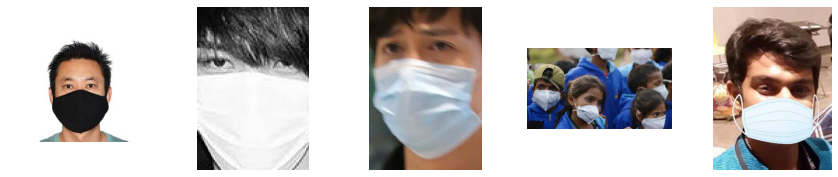

In [33]:
#5 random images for people with mask from your training set.
with_mask_path = os.path.join(training_path, "with_mask")

# Get a list of all the image filenames in the with_mask folder
with_mask_images = os.listdir(with_mask_path)

# Select 5 random images from the list
random_images = random.sample(with_mask_images, 5)

# Plot the images
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

for i, image_name in enumerate(random_images):
    image_path = os.path.join(with_mask_path, image_name)
    image = plt.imread(image_path)
    ax[i].imshow(image)
    ax[i].axis("off")

plt.show()

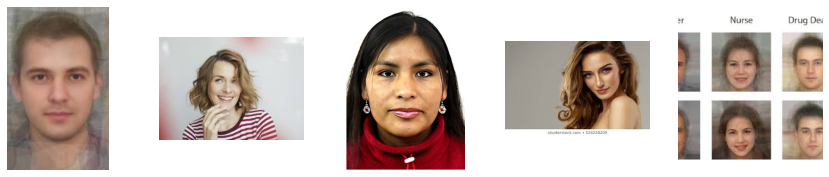

In [34]:
# without mask.
without_mask_path = os.path.join(training_path, "without_mask")

# Get a list of all the image filenames in the with_mask folder
without_mask_images = os.listdir(without_mask_path)

# Select 5 random images from the list
random_images = random.sample(without_mask_images, 5)

# Plot the images
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

for i, image_name in enumerate(random_images):
    image_path = os.path.join(without_mask_path, image_name)
    image = plt.imread(image_path)
    ax[i].imshow(image)
    ax[i].axis("off")

plt.show()


In [23]:
#TModeling 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

we have 4 convolutional layers, Max Pooling a flatten layer (conv2D) the a 2 fully conected layers with Relu, finally a softmax output layer with 2 neurons since we have 2 classes (with and without mask)

In [ ]:
#TRAINING
from tensorflow import keras
# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Define data generators for training and validation
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_path, 
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    validation_path, 
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical') 

# Train the model + Save it in a variable to use for plotting
history = model.fit(
    train_generator, 
    steps_per_epoch=50, 
    epochs=5, 
    validation_data=val_generator,
    validation_steps=10)

In [ ]:
# get the accuracy values from the history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# plot the accuracy curves
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From this plot, we can see that during the training our model couldn't learn anything in the first 2 epochs, the model started actually learning in the 3rd epoch the accuracy went down a little in the poch 4 then went up again to reach an accuracy higher than the one in epoch 1 till 4 so the learning in the 4th epoch wasn't the highest that our model can learn 

In [ ]:
# Evaluate the model on the test data
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    testing_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

In [ ]:
#Confusion MATRIX
from sklearn.metrics import confusion_matrix

# get the true labels and predicted labels
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)

cm = confusion_matrix(y_true, y_pred)

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['with_mask', 'without_mask'],
       yticklabels=['with_mask', 'without_mask'],
       ylabel='True label',
       xlabel='Predicted label')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='white')
fig.colorbar(im)
plt.show()

In [ ]:
# get the predictions of the model on the testing set
Y_pred = model.predict(test_generator)

# get the ground truth of the testing set
y_true = test_generator.classes

# get the class labels of the testing set
class_labels = list(test_generator.class_indices.keys())

# get the filenames of the testing set
filenames = test_generator.filenames

# loop over the images in the testing set
for i in range(len(filenames)):
    # get the filename and the ground truth label of the image
    filename = filenames[i]
    y_true_label = class_labels[y_true[i]]
    
    # get the predicted probabilities for the image
    y_pred_probs = Y_pred[i]
    
    # get the predicted label and the predicted probability
    y_pred_label = class_labels[np.argmax(y_pred_probs)]
    y_pred_prob = y_pred_probs[np.argmax(y_pred_probs)]
    
    # load and show the image
    img = plt.imread(testing_path + '/' + filename)
    plt.imshow(img)
    plt.axis('off')
    
    # print the ground truth label, the predicted label, and the predicted probability
    print('Ground Truth: ' + y_true_label)
    print('Prediction: ' + y_pred_label)
    print('Probability: ' + str(y_pred_prob))
    
    # show the image and wait for 1 second before showing the next image
    plt.show(block=False)
    plt.pause(1)
    
plt.show() # to close the final figure window




# Conclusion

We can't see any common factors among the misclassified images, but It is cleary that sided images are misclasified and if the images is a little bit away *zoomed out) also is misclassified

In [ ]:
#Trying to make the model do better
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data augmentation transformations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

#The data generators for the training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/content/data/Validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

#Model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)